# Campaign Dataset analysis
* Customer profiles
* Products purchased
* Campaign success (or failure)
* Channel performance

In [298]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
camp_df = pd.read_csv("campaign - campaign.csv")
camp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2239 non-null   int64 
 1   Year_Birth           2239 non-null   int64 
 2   Education            2239 non-null   object
 3   Marital_Status       2239 non-null   object
 4   Income               2239 non-null   object
 5   Kidhome              2239 non-null   int64 
 6   Teenhome             2239 non-null   int64 
 7   Dt_Customer          2239 non-null   object
 8   Recency              2239 non-null   int64 
 9   MntWines             2239 non-null   int64 
 10  MntFruits            2239 non-null   int64 
 11  MntMeatProducts      2239 non-null   int64 
 12  MntFishProducts      2239 non-null   int64 
 13  MntSweetProducts     2239 non-null   int64 
 14  MntGoldProds         2239 non-null   int64 
 15  NumDealsPurchases    2239 non-null   int64 
 16  NumWeb

In [299]:
camp_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,4,6,1,0,0,0,0,0,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,3,7,5,0,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,2,5,2,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,0,2,7,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,1,2,7,1,0,0,0,0,0,SP


In [300]:
# Checking for null values
camp_df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Country                0
dtype: int64

In [301]:
# Handling $nan values and converting income to int type
camp_df["Income"] = [int(i) if i != 'nan' else None for i in camp_df["Income"].apply(
    lambda x: str(x).strip('$').replace(',', "").replace('.00',""))]

In [302]:
# Preprocessing date of customer joining
from datetime import datetime as dt
camp_df["Dt_Customer"] = camp_df["Dt_Customer"].apply(
    lambda x: dt.strptime(x, "%m/%d/%y"))
camp_df["enrollment_year"] = camp_df["Dt_Customer"].dt.year
camp_df["enrollment_month"] = camp_df["Dt_Customer"].dt.month

In [303]:
# Identifying the boolean columns containing only 0(s) or 1(s)
[i for i in camp_df.columns if camp_df[i].isin([0,1]).all()]

['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain']

In [304]:
# Converting Complain column to True/False values
camp_df["Complain"] = camp_df.Complain.map(lambda x: True if x == 1 else False)

In [305]:
# Combining all Accepted Campaigns to a single column called Campaign and dropping the originals
df_campaign_cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2']
camp_df['Campaign'] = camp_df[df_campaign_cols].idxmax(axis=1)
camp_df.drop(df_campaign_cols+['ID', 'Dt_Customer'], axis=1, inplace=True)
camp_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Country,enrollment_year,enrollment_month,Campaign
0,1970,Graduation,Divorced,84835.0,0,0,0,189,104,379,...,1,4,4,6,1,False,SP,2014,6,AcceptedCmp3
1,1961,Graduation,Single,57091.0,0,0,0,464,5,64,...,1,7,3,7,5,False,CA,2014,6,AcceptedCmp2
2,1958,Graduation,Married,67267.0,0,1,0,134,11,59,...,1,3,2,5,2,False,US,2014,5,AcceptedCmp3
3,1967,Graduation,Together,32474.0,1,1,0,10,0,1,...,1,1,0,2,7,False,AUS,2014,5,AcceptedCmp3
4,1989,Graduation,Single,21474.0,1,0,0,6,16,24,...,2,3,1,2,7,False,SP,2014,4,AcceptedCmp3


### General Customer Profile Analysis

In [306]:
# Initial analysis of all the Continuous variables
camp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2239.0,1968.802144,11.985494,1893.0,1959.0,1970.0,1977.0,1996.0
Income,2215.0,51969.861400,21526.320095,1730.0,35284.0,51373.0,68487.0,162397.0
Kidhome,2239.0,0.443948,0.538390,0.0,0.0,0.0,1.0,2.0
Teenhome,2239.0,0.506476,0.544555,0.0,0.0,0.0,1.0,2.0
Recency,2239.0,49.121036,28.963662,0.0,24.0,49.0,74.0,99.0
MntWines,2239.0,304.067441,336.614830,0.0,24.0,174.0,504.5,1493.0
MntFruits,2239.0,26.307727,39.781468,0.0,1.0,8.0,33.0,199.0
MntMeatProducts,2239.0,167.016525,225.743829,0.0,16.0,67.0,232.0,1725.0
MntFishProducts,2239.0,37.538633,54.637617,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2239.0,27.074587,41.286043,0.0,1.0,8.0,33.0,263.0


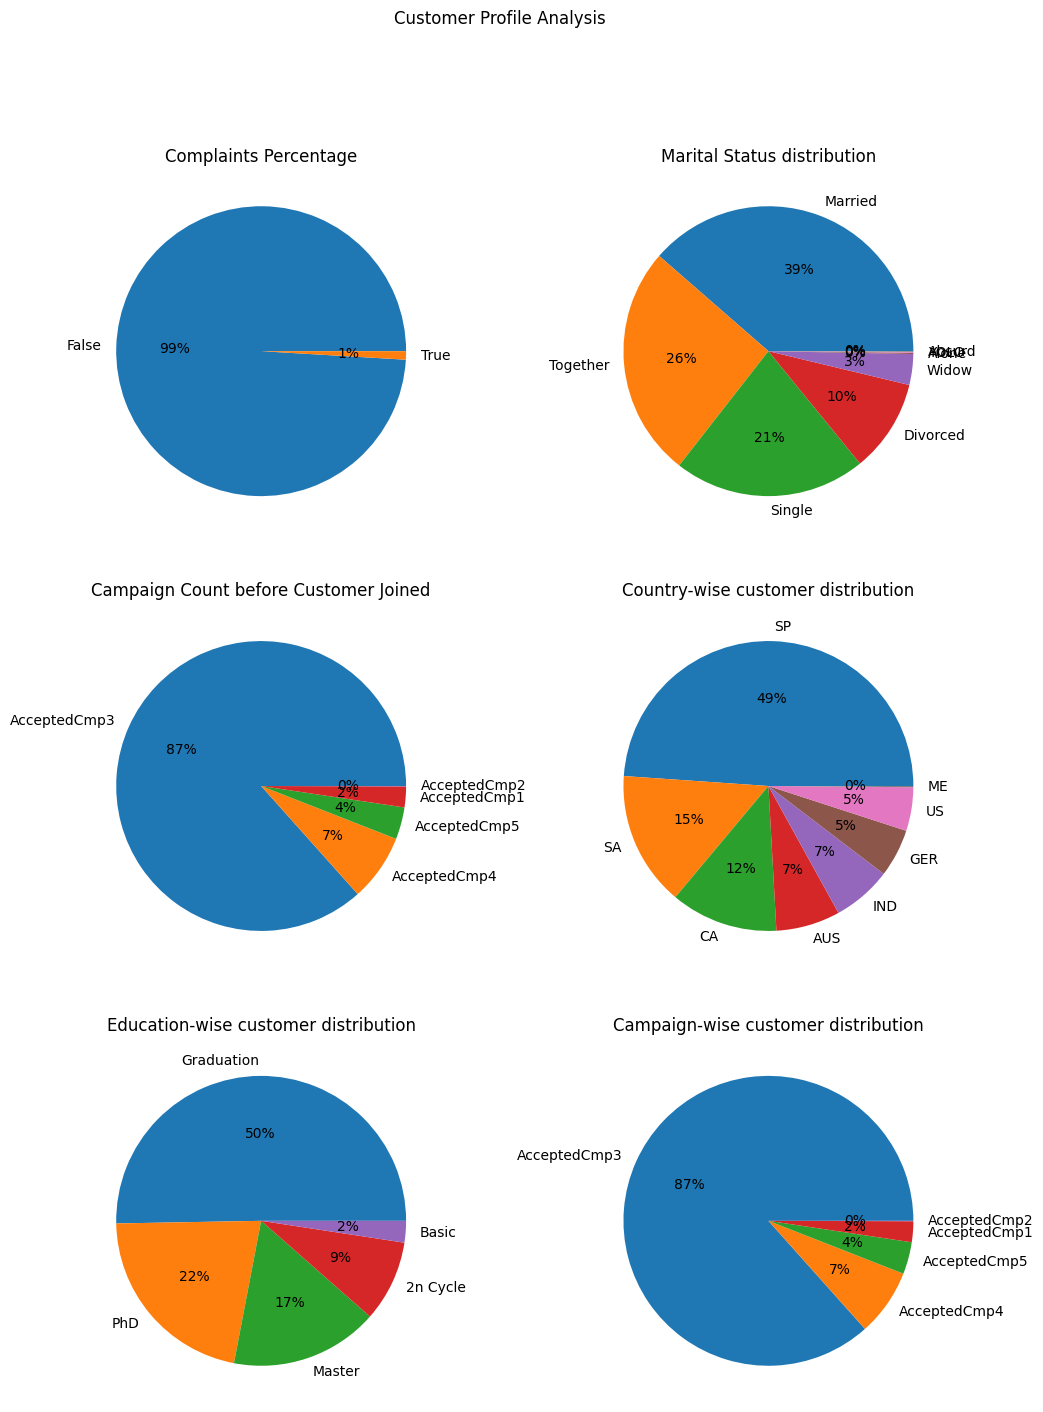

In [307]:
# Customer Profile Analysis
fig, ax = plt.subplots(3, 2, figsize=(12, 16))
ax[0, 0].pie(x=camp_df["Complain"].value_counts(
), labels=camp_df["Complain"].value_counts().index, autopct='%1.0f%%')
ax[0, 0].set_title("Complaints Percentage")
ax[0, 1].pie(x=camp_df["Marital_Status"].value_counts(
), labels=camp_df["Marital_Status"].value_counts().index, autopct='%1.0f%%')
ax[0, 1].set_title("Marital Status distribution")
ax[1, 0].pie(x=camp_df["Campaign"].value_counts(
), labels=camp_df["Campaign"].value_counts().index, autopct='%1.0f%%')
ax[1, 0].set_title("Campaign Count before Customer Joined")
ax[1, 1].pie(x=camp_df["Country"].value_counts(
), labels=camp_df["Country"].value_counts().index, autopct='%1.0f%%')
ax[1, 1].set_title("Country-wise customer distribution")
ax[2, 0].pie(x=camp_df["Education"].value_counts(
), labels=camp_df["Education"].value_counts().index, autopct='%1.0f%%')
ax[2, 0].set_title("Education-wise customer distribution")
ax[2, 1].pie(x=camp_df["Campaign"].value_counts(
), labels=camp_df["Campaign"].value_counts().index, autopct='%1.0f%%')
ax[2, 1].set_title("Campaign-wise customer distribution")
fig.suptitle("Customer Profile Analysis")
plt.show()

### Customer Profile Analysis:

* Complaints Percentage:
   * False (No complaints): 99%
   * True (Complaints registered): 1%
   * The vast majority of customers have not registered complaints.
* Marital Status Distribution:
   * Married (blue): 39%
   * Together (orange): 26%
   * Single (green): 21%
   * Divorced (red): 10%
   * Widow (purple): 3%
   * Most customers are either Married or in a relationship (“Together”), accounting for over 65% combined.
* Campaign Count Before Customer Joined:
   * AcceptedCmp3 (blue): 87%
   * Other campaigns (Cmp4: 7%, Cmp5: 4%, Cmp1 and Cmp2: negligible).
   * The third campaign (Cmp3) accounts for the majority of pre-joining customer interactions.
* Country-wise Customer Distribution:
  * SP (Spain) (blue): 49%
  * SA (South Africa) (orange): 15%
  * CA (Canada) (green): 12%
  * Other countries like AUS, IND, GER, US, and ME together represent a smaller share (under 25% combined).
  * Spain has the largest share of customers, nearly half.
* Education-wise Customer Distribution:
  * Graduation (blue): 50%
  * PhD (orange): 22%
  * Master (green): 17%
  * 2n Cycle (red): 9%
  * Basic (purple): 2%
  * Most customers have a Graduation or higher qualification, with very few having only basic education.
* Campaign-wise Customer Distribution:
  * AcceptedCmp3 (blue): 87%
  * AcceptedCmp4: 7%
  * Other campaigns (Cmp5: 4%, Cmp1 and Cmp2: negligible).
  * Campaign 3 has the highest acceptance rate among customers.

#### Inference

This analysis highlights the dominance of Campaign 3 in both pre-joining and post-joining customer interactions, the prominence of Graduation-level education, and the largest share of customers being from Spain. Additionally, a negligible number of customers register complaints, and the Married demographic forms the largest group.

Maximum Year of birth for customer's is 1996 and the minimum year of enrollement is 2012. So taking the reference year as 2016, we categorize the below 6 age categories for the customers
* Young Adults: 18–24 year
* Adults: 25–34 year
* Early Middle-Aged: 35–44 year
* Middle-Aged: 45–54 year
* Late Middle-Aged: 55–64 year
* Seniors: 65+ years

In [308]:
# Creating an Age Group column for Customer Profile
camp_df["Age as of 2016"] = 2016-camp_df["Year_Birth"]
camp_df["AgeCategory"] = pd.cut(camp_df["Age as of 2016"], bins=[17, 24, 34, 44, 54, 64, 150], labels=["Young Adults", "Adults", "Early Middle-Aged", "Middle-Aged", "Late Middle-Aged", "Seniors"])
camp_df.drop(["Age as of 2016", "Year_Birth"], axis=1, inplace=True)

In [309]:
# Clubbing the Similar marital status together
camp_df["Marital_Status"] = camp_df["Marital_Status"].apply(
    lambda x: "Couple" if x in ["Married", "Together"] else "Alone")

# Setting income brackets for the data available
camp_df["Income Bracket"] = pd.cut(
    camp_df["Income"], bins=3, labels=["Low", "Avg", "High"])

Text(0.5, 1.0, 'Analysis on Income as per age category and Education')

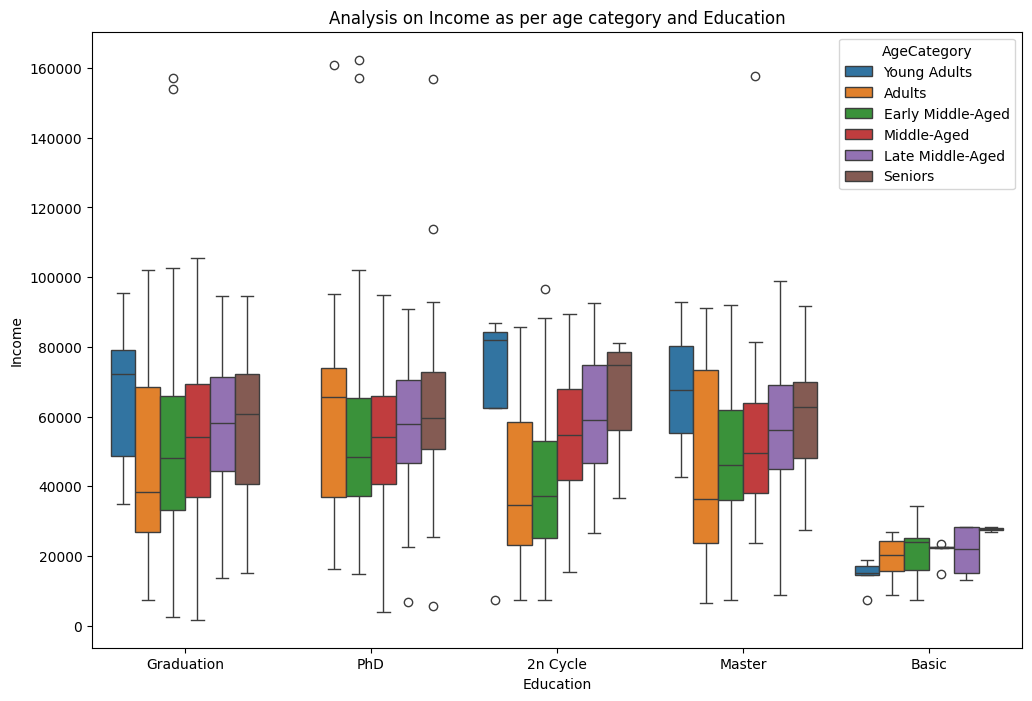

In [345]:
plt.figure(figsize=(12, 8))
sns.boxplot(camp_df, x="Education", y="Income", hue="AgeCategory")
plt.title("Analysis on Income as per age category and Education")

In [348]:
# Testing hypothesis that Education and Income is correlated
from scipy.stats import chi2_contingency
val = pd.crosstab(index=camp_df["Education"],
                  columns=camp_df["Income Bracket"]).values

# H0: Education and Income are independent
# Ha: Education and Income are dependent
chi_stat, p_value, df, expected_values = chi2_contingency(val)
if p_value<0.05:
    print("Reject Null Hypothesis.\nEducation and Income are dependent")
else:
    print("Not enough evidence to reject null hypothesis.\nEducation and Income are independent")

Reject Null Hypothesis.
Education and Income are dependent


In [354]:
# Income Wise Analysis on Product Category Purchase Amount distribution
mnt_cols = [i for i in camp_df.columns if "Mnt" in i]
camp_df_prod_inc = camp_df.groupby("Income Bracket")[mnt_cols].sum().reset_index()
camp_df_prod_inc


,Income Bracket,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Low,120527,9330,49610,14524,9793,30979
1,Avg,555338,49037,315475,68846,49831,66415
2,High,209,24,4960,27,271,21


In [312]:
# Age group distribution
camp_df["AgeCategory"].value_counts()

AgeCategory
Early Middle-Aged    653
Middle-Aged          585
Late Middle-Aged     473
Adults               318
Seniors              182
Young Adults          28
Name: count, dtype: int64

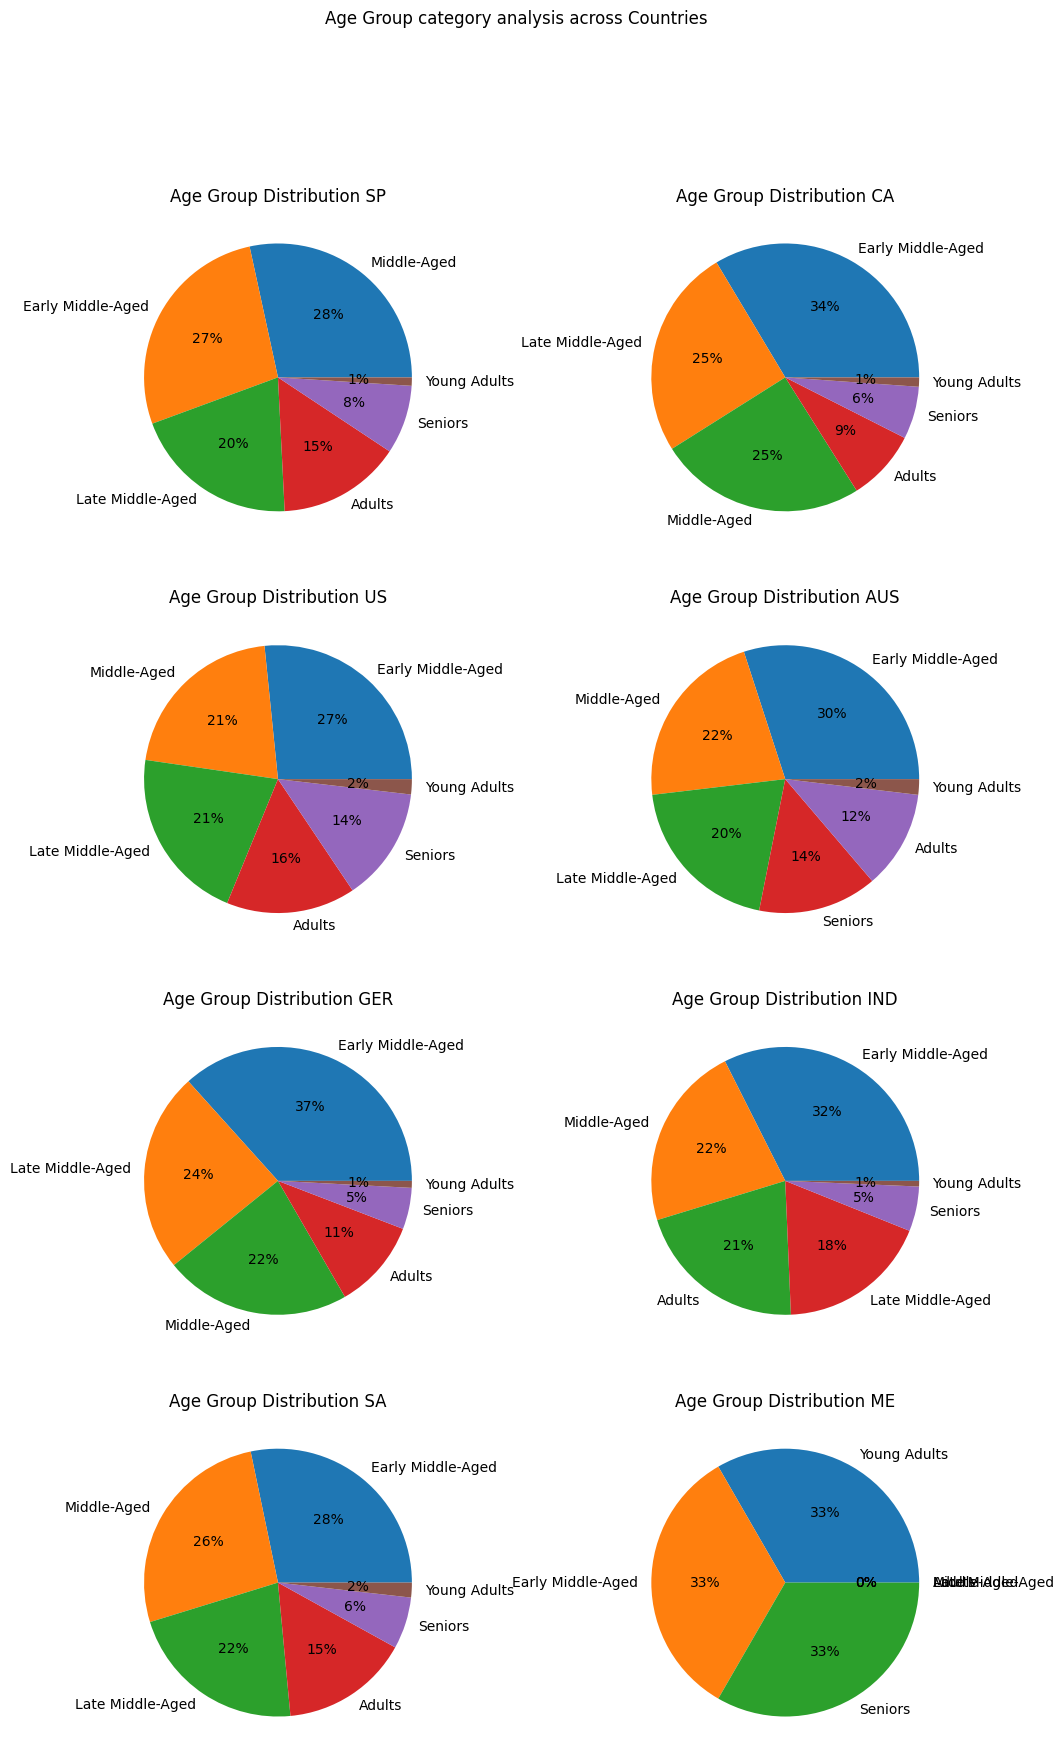

In [313]:
# Country-wise Age group analysis
fig, ax = plt.subplots(4, 2, figsize=(12, 20))
idx = 0
countries = camp_df.Country.unique()
for i in range(4):
    for j in range(2):
        ax[i, j].pie(x=camp_df[camp_df["Country"]==countries[idx]]["AgeCategory"].value_counts(),
                     labels=camp_df[camp_df["Country"]==countries[idx]]["AgeCategory"].value_counts().index, autopct='%1.0f%%')
        ax[i, j].set_title(
            f"Age Group Distribution {countries[idx]}")
        idx += 1
fig.suptitle("Age Group category analysis across Countries")
plt.show()

### Age Group Observations:

1. **Purchase Categories**:
* NumStorePurchases (red)
* NumWebPurchases (orange)
* NumCatalogPurchases (green)
* NumDealsPurchases (blue)
* NumWebVisitsMonth (purple)
2. **General Trends**:
* **Store Purchases (red)**: This category consistently accounts for the largest share across all age groups, with percentages ranging from approximately 28% to 31%.
* **Web Visits (purple)**: This is generally the second-largest contributor, with percentages ranging from 23% to 30%.
* **Catalog Purchases (green)**: This tends to occupy a smaller portion, with percentages ranging from 11% to 22%, varying by age group.
* **Web Purchases (orange)**: Generally a moderate contributor, around 18% to 22%.
* **Deals Purchases (blue)**: Always the smallest contributor, with values between 7% to 13%.
3. **Age-Specific Trends**:
* **Young Adults**: Higher emphasis on Store Purchases (31%), followed by Web Visits (23%).
* **Seniors**: Similar pattern but slightly more Catalog Purchases (16%) than other groups.
* **Middle-Aged Groups**: Balanced proportions, with Web Visits peaking in contribution (29%).

#### Inference
Store Purchases dominate across all age groups, while Deals Purchases remain the least preferred. Other categories like Web Visits and Catalog Purchases show more variability depending on the age group.

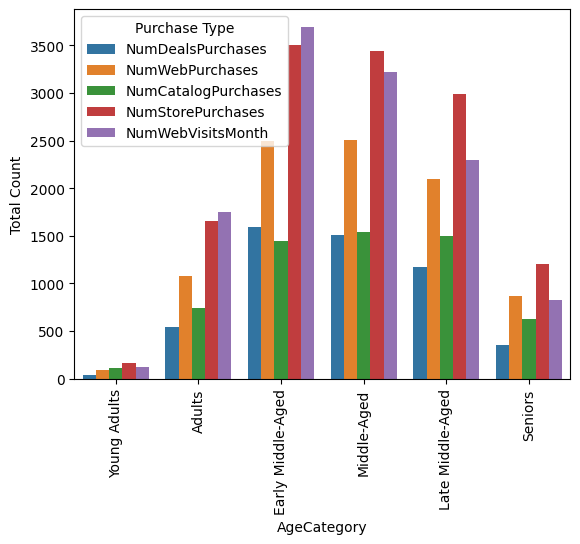

In [314]:
# Age Group Category Wise Analysis on Purchase type
num_cols = [i for i in camp_df.columns if "Num" in i]
camp_df_num = camp_df.groupby("AgeCategory")[num_cols].sum().reset_index()
num_melted = camp_df_num.melt(
    id_vars="AgeCategory", var_name="Purchase Type", value_name="Total Count")
sns.barplot(data=num_melted, x="AgeCategory", y="Total Count", hue="Purchase Type")
plt.xticks(rotation=90)
plt.show()

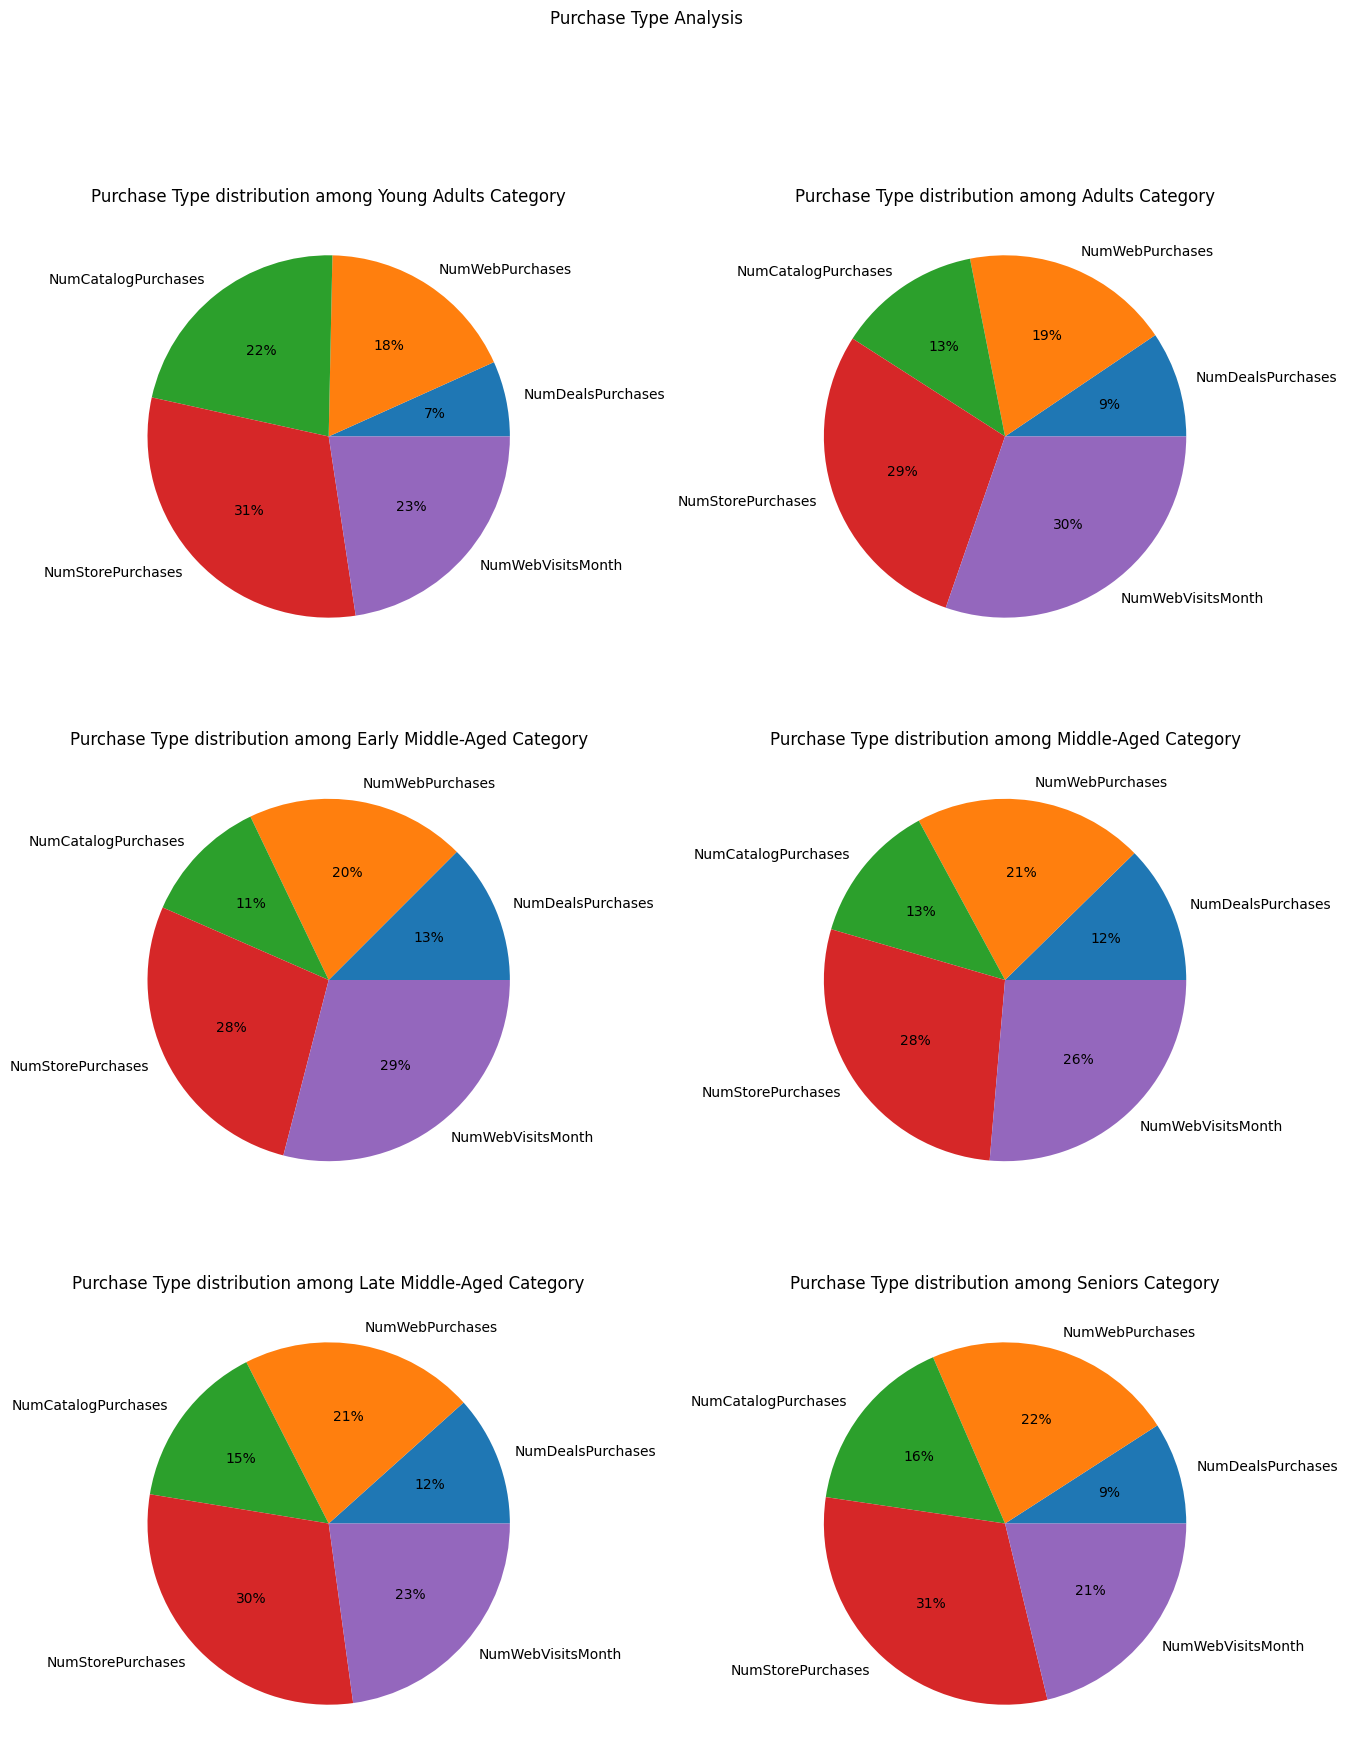

In [315]:
fig, ax = plt.subplots(3, 2, figsize=(16, 20))
idx = 0
for i in range(3):
    for j in range(2):
        ax[i, j].pie(x=camp_df_num.iloc[idx, 1:],
                     labels=camp_df_num.columns[1:], autopct='%1.0f%%')
        ax[i, j].set_title(
            f"Purchase Type distribution among {camp_df_num.iloc[idx, 0]} Category")
        idx += 1
fig.suptitle("Purchase Type Analysis")
plt.show()

### Purchase Type Observations

**1. Purchase Categories**:
* NumStorePurchases (red)
* NumWebPurchases (orange)
* NumCatalogPurchases (green)
* NumDealsPurchases (blue)
* NumWebVisitsMonth (purple)

**2. General Trends**:
* **Store Purchases (red)**: This category consistently accounts for the largest share across all age groups, with percentages ranging from approximately 28% to 31%.
* **Web Visits (purple)**: This is generally the second-largest contributor, with percentages ranging from 23% to 30%.
* **Catalog Purchases (green)**: This tends to occupy a smaller portion, with percentages ranging from 11% to 22%, varying by age group.
* **Web Purchases (orange)**: Generally a moderate contributor, around 18% to 22%.
* **Deals Purchases (blue)**: Always the smallest contributor, with values between 7% to 13%.

**3. Age-Specific Trends**:
* **Young Adults**: Higher emphasis on Store Purchases (31%), followed by Web Visits (23%).
* **Seniors**: Similar pattern but slightly more Catalog Purchases (16%) than other groups.
* **Middle-Aged Groups**: Balanced proportions, with Web Visits peaking in contribution (29%).

#### Inference
Store Purchases dominate across all age groups, while Deals Purchases remain the least preferred. Other categories like Web Visits and Catalog Purchases show more variability depending on the age group.

In [316]:
# Country Wise Analysis on Product Category Purchase Amount distribution
mnt_cols = [i for i in camp_df.columns if "Mnt" in i]
camp_df_prod = camp_df.groupby("Country")[mnt_cols].sum().reset_index()
camp_df_prod

,Country,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,AUS,44372,3884,23097,5834,4608,7968
1,CA,84649,7746,46148,10028,7678,12283
2,GER,37483,3062,20874,4767,2870,5857
3,IND,36268,3790,25336,4830,3225,6036
4,ME,1729,8,817,226,122,220
5,SA,105909,8923,58380,13662,9018,15117
6,SP,337991,28446,179042,40265,30214,46262
7,US,32406,3044,20256,4437,2885,4854


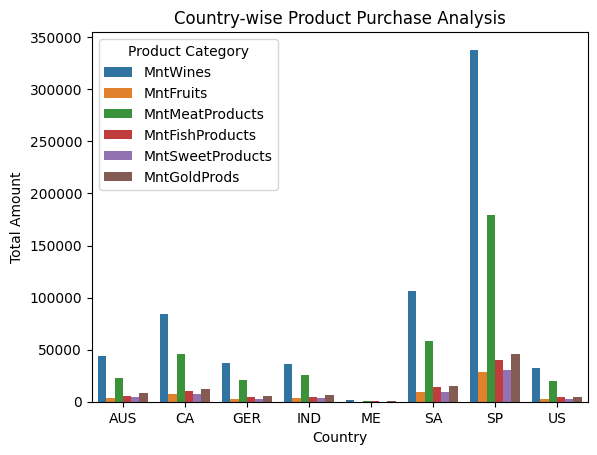

In [317]:
# Creating a molten DF for visualization
melted_prod = camp_df_prod.melt(
    id_vars="Country", var_name="Product Category", value_name="Total Amount")

sns.barplot(x="Country", y="Total Amount", hue="Product Category", data=melted_prod)
plt.title("Country-wise Product Purchase Analysis")
plt.show()

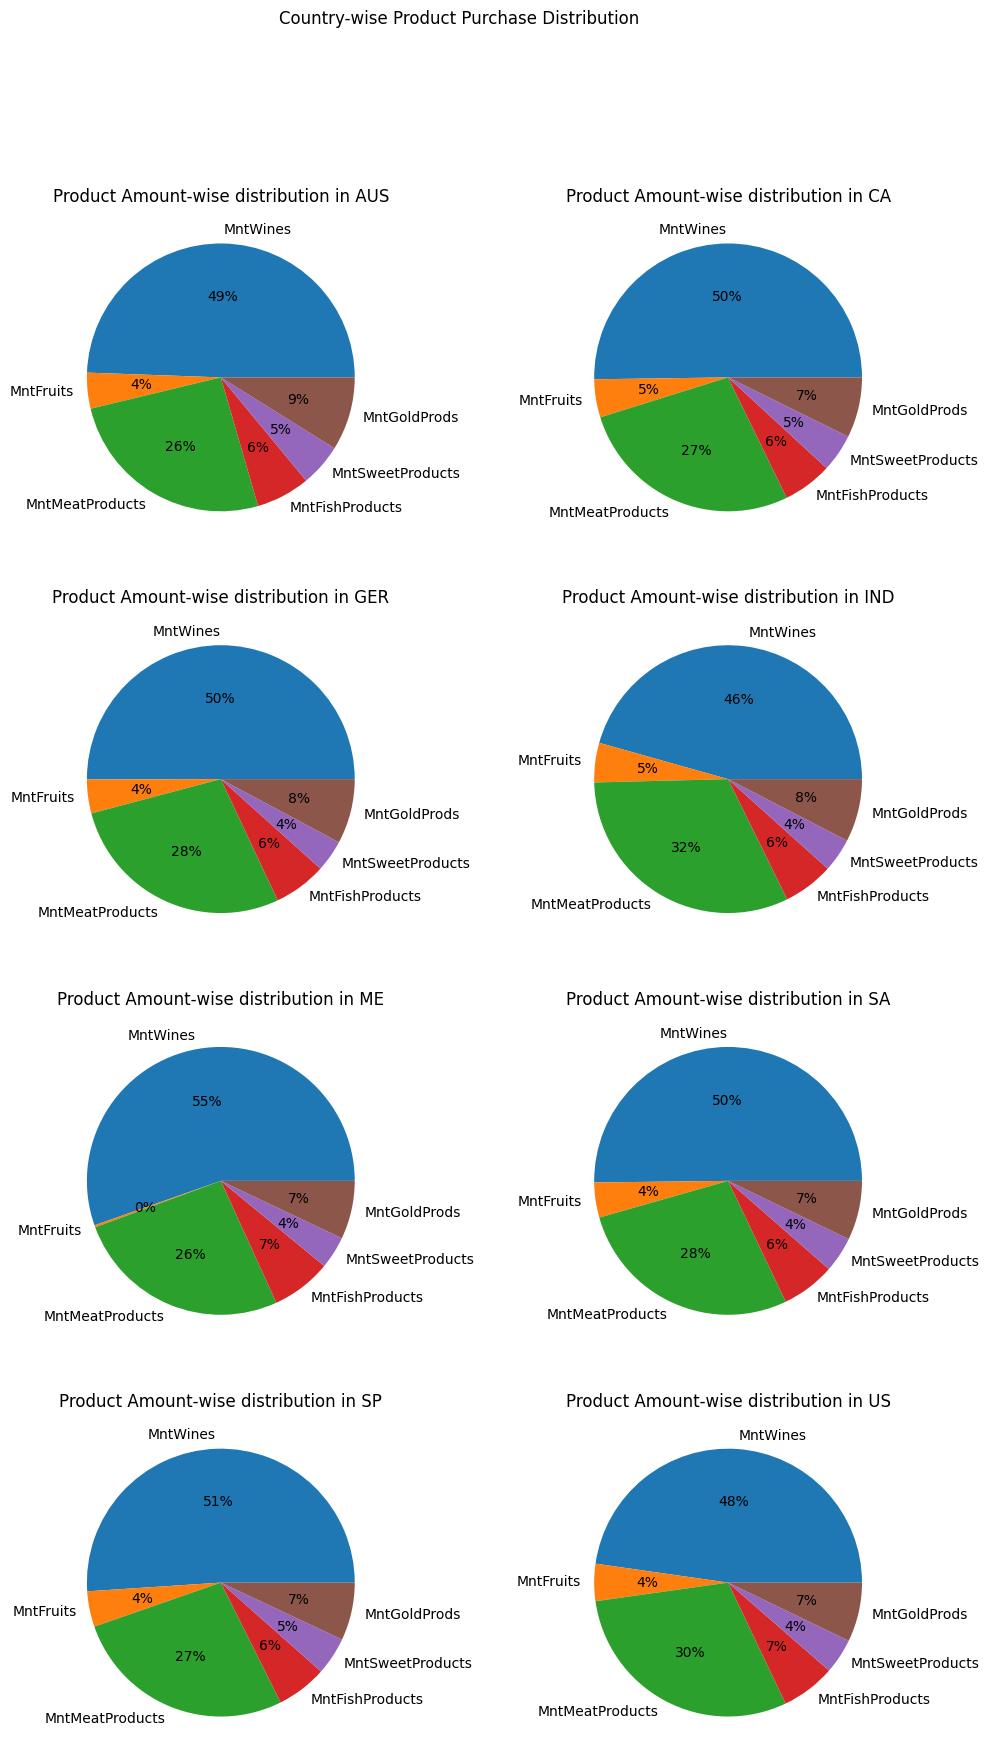

In [318]:
fig, ax = plt.subplots(4, 2, figsize=(12, 20))
idx = 0
for i in range(4):
    for j in range(2):
        ax[i, j].pie(x=camp_df_prod.iloc[idx, 1:], labels=camp_df_prod.columns[1:], autopct='%1.0f%%')
        ax[i, j].set_title(f"Product Amount-wise distribution in {camp_df_prod.iloc[idx, 0]}")
        idx+=1
fig.suptitle("Country-wise Product Purchase Distribution")
plt.show()

### Product Category Analysis

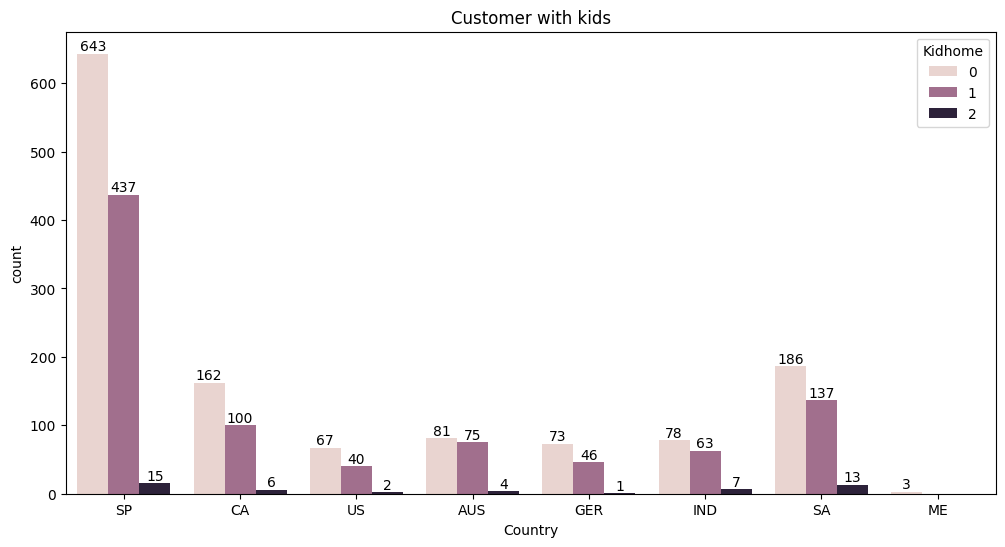

In [319]:
# Kids analysis
fig = plt.figure(figsize=(12, 6))
ax = sns.countplot(camp_df, x="Country", hue="Kidhome")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Customer with kids")
plt.show()

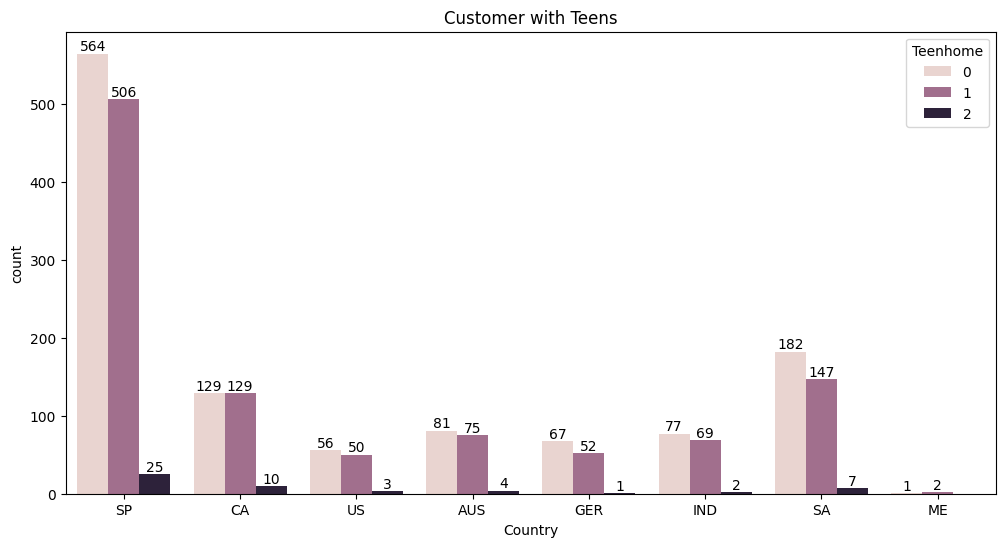

In [320]:
# Teens analysis
fig = plt.figure(figsize=(12, 6))
ax = sns.countplot(camp_df, x="Country", hue="Teenhome")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Customer with Teens")
plt.show()

As per the above analysis, we see that the majority of the customers belong to the below category:
* Age Group : Early-Middle Age (35-44 yrs)
* Across all age groups and countries, store purchases are most prominent
* Most purchased items belong to Wine category (irresprective of the country)
* Most overall purchases made by Spain (SP)

In [321]:
shop_df = pd.read_csv("shopping.csv")
shop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [322]:
shop_df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [323]:
shop_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


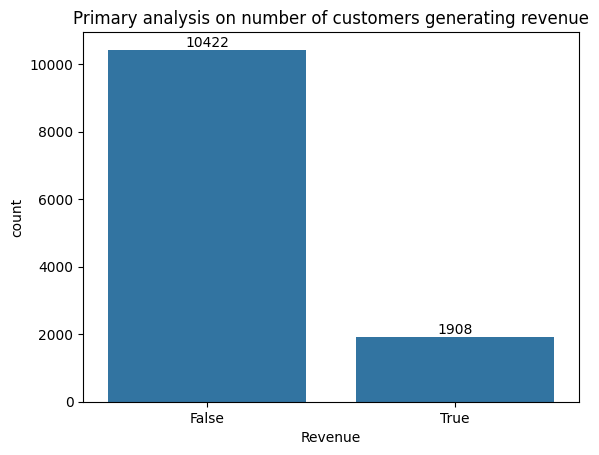

In [324]:
ax = sns.countplot(shop_df, x="Revenue")
plt.title("Primary analysis on number of customers generating revenue")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

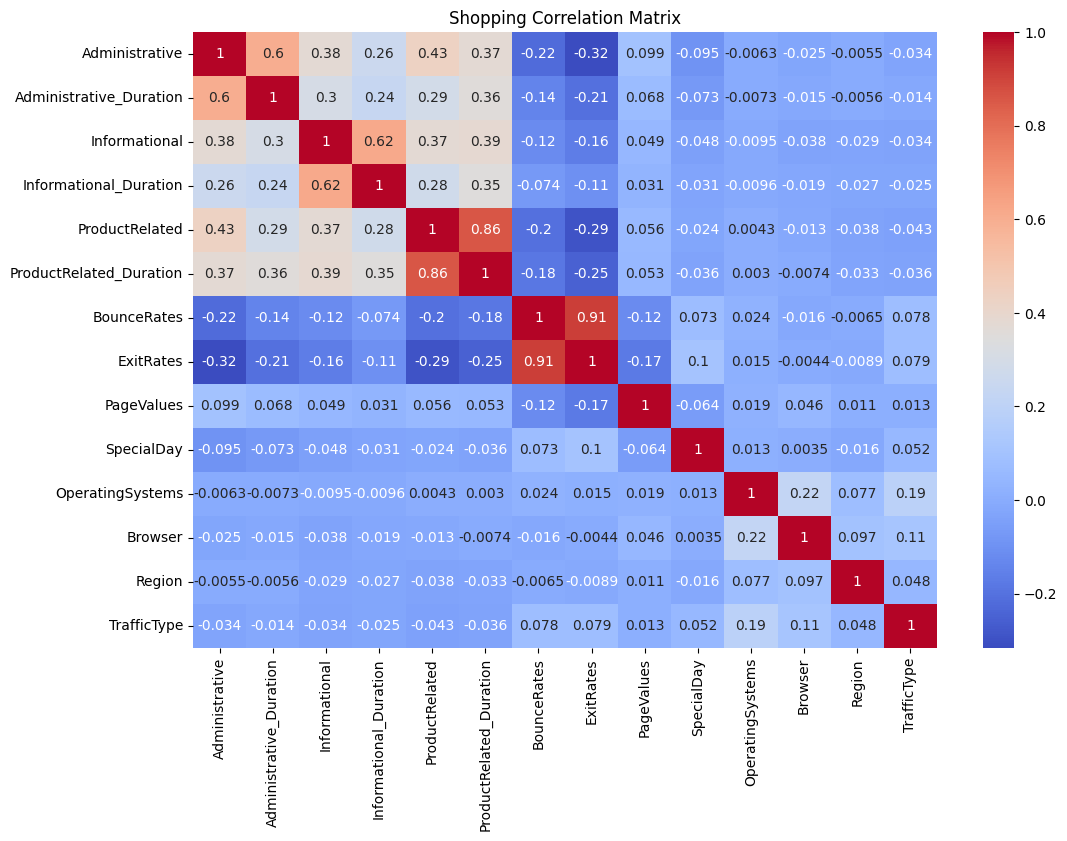

In [325]:
fig = plt.figure(figsize=(12, 8))
sns.heatmap(shop_df[shop_df.select_dtypes(include='number').columns].corr(),
            annot=True, cmap="coolwarm")
plt.title("Shopping Correlation Matrix")
plt.show()

In [326]:
page_categories = ["Administrative", "ProductRelated", "Informational"]

engagement_metrics = ["Administrative_Duration",
                      "Informational_Duration", "ProductRelated_Duration", "ExitRates"]


segment_data = shop_df[page_categories + engagement_metrics]


# Iterate through each page category
for category in page_categories:
    # Select data for the current category
    category_data = segment_data[segment_data[category] > 0]

    # Summarize page views
    page_views = category_data[category].sum()

    # Summarize page durations
    avg_duration = category_data[f"{category}_Duration"].mean()

    # Summarize exit rates
    avg_exit_rate = category_data["ExitRates"].mean()

    # Print summary for the category
    print(f"\nSummary for Page Category: {category}")
    print(f"- Total Page Views: {page_views}")
    print(f"- Average Page Duration: {avg_duration:.2f} ")
    print(f"- Average Exit Rate: {avg_exit_rate:.2f}")


Summary for Page Category: Administrative
- Total Page Views: 28546
- Average Page Duration: 151.86 
- Average Exit Rate: 0.02

Summary for Page Category: ProductRelated
- Total Page Views: 391249
- Average Page Duration: 1198.44 
- Average Exit Rate: 0.04

Summary for Page Category: Informational
- Total Page Views: 6209
- Average Page Duration: 161.55 
- Average Exit Rate: 0.02


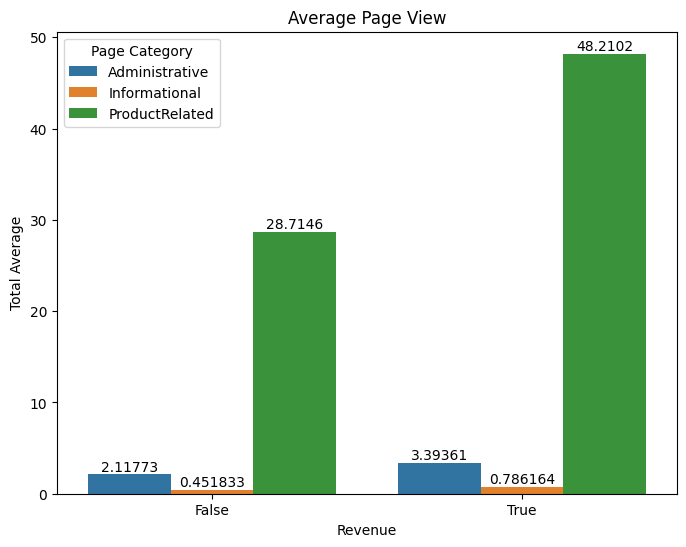

In [327]:
# Average Page View Count analysis
avg_pg_cnt_df = shop_df.groupby('Revenue')[['Administrative', 'Informational', 'ProductRelated']].mean().reset_index()
avg_pg_cnt_df_melt = avg_pg_cnt_df.melt(id_vars="Revenue", value_vars=[
                                'Administrative', 'Informational', 'ProductRelated'], var_name="Page Category", value_name="Total Average")
fig = plt.figure(figsize=(8, 6))
ax = sns.barplot(avg_pg_cnt_df_melt, x="Revenue", y="Total Average", hue="Page Category")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Average Page View")
plt.show()

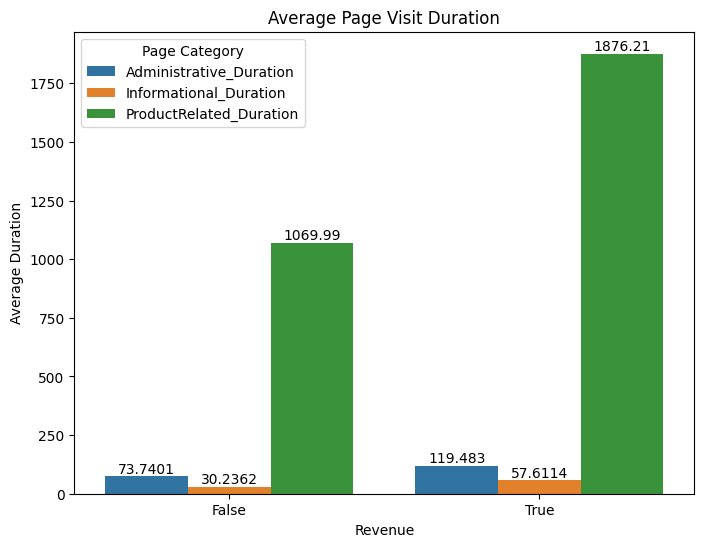

In [328]:
# Average Page Visit Duration analysis
avg_pg_cnt_df = shop_df.groupby('Revenue')[
    ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].mean().reset_index()
avg_pg_cnt_df_melt = avg_pg_cnt_df.melt(id_vars="Revenue", value_vars=[
    'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration'], var_name="Page Category", value_name="Average Duration")
fig = plt.figure(figsize=(8, 6))
ax = sns.barplot(avg_pg_cnt_df_melt, x="Revenue",
                 y="Average Duration", hue="Page Category")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Average Page Visit Duration")
plt.show()

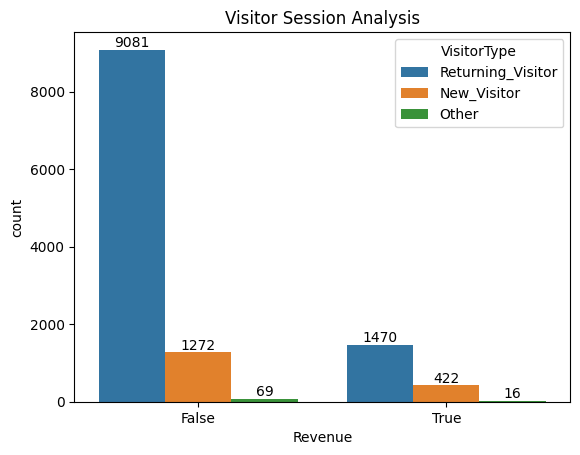

In [329]:
# Visitor Session Analysis
ax = sns.countplot(shop_df, x="Revenue", hue="VisitorType")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Visitor Session Analysis")
plt.show()

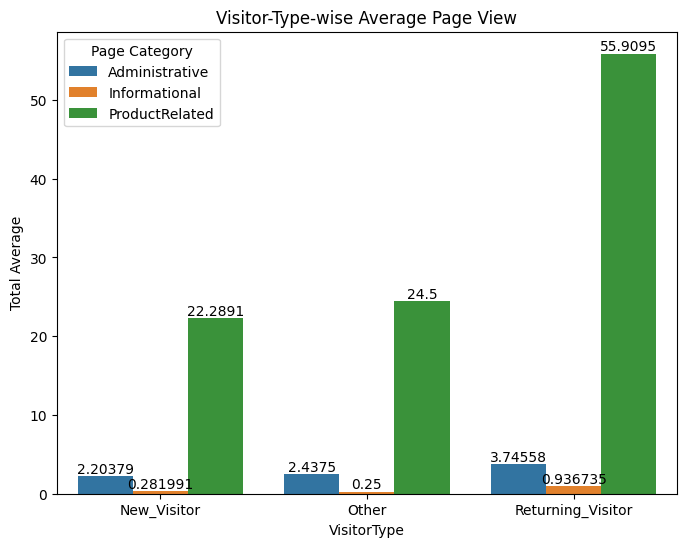

In [330]:
# Average Page View Count (Visitor-Type-wise) analysis on Customers generating revenue
avg_pg_cnt_df = shop_df[shop_df.Revenue].groupby('VisitorType')[
    ['Administrative', 'Informational', 'ProductRelated']].mean().reset_index()
avg_pg_cnt_df_melt = avg_pg_cnt_df.melt(id_vars="VisitorType", value_vars=[
    'Administrative', 'Informational', 'ProductRelated'], var_name="Page Category", value_name="Total Average")
fig = plt.figure(figsize=(8, 6))
ax = sns.barplot(avg_pg_cnt_df_melt, x="VisitorType",
                 y="Total Average", hue="Page Category")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Visitor-Type-wise Average Page View")
plt.show()

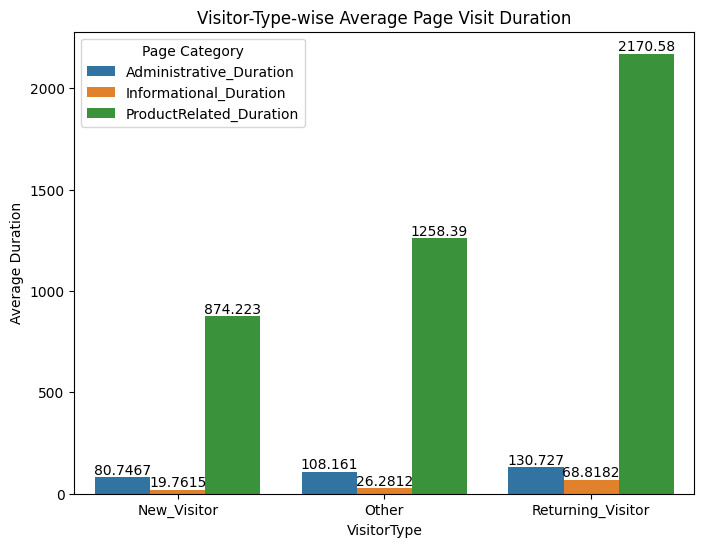

In [331]:
# Average Page View Duration (Visitor-Type-wise) analysis on Customers generating revenue
avg_pg_cnt_df = shop_df[shop_df.Revenue].groupby('VisitorType')[
    ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].mean().reset_index()
avg_pg_cnt_df_melt = avg_pg_cnt_df.melt(id_vars="VisitorType", value_vars=[
    'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration'], var_name="Page Category", value_name="Average Duration")
fig = plt.figure(figsize=(8, 6))
ax = sns.barplot(avg_pg_cnt_df_melt, x="VisitorType",
                 y="Average Duration", hue="Page Category")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Visitor-Type-wise Average Page Visit Duration")
plt.show()

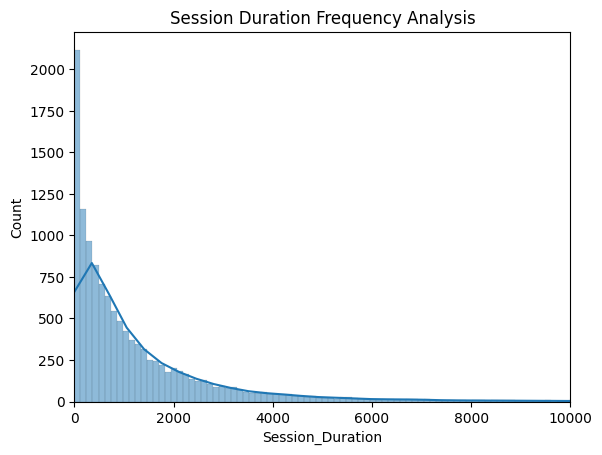

In [332]:
shop_df["Session_Duration"] = shop_df[["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]].sum(axis=1)
sns.histplot(shop_df["Session_Duration"], kde=True)
plt.xlim(0, 10000)
plt.title("Session Duration Frequency Analysis")
plt.show()

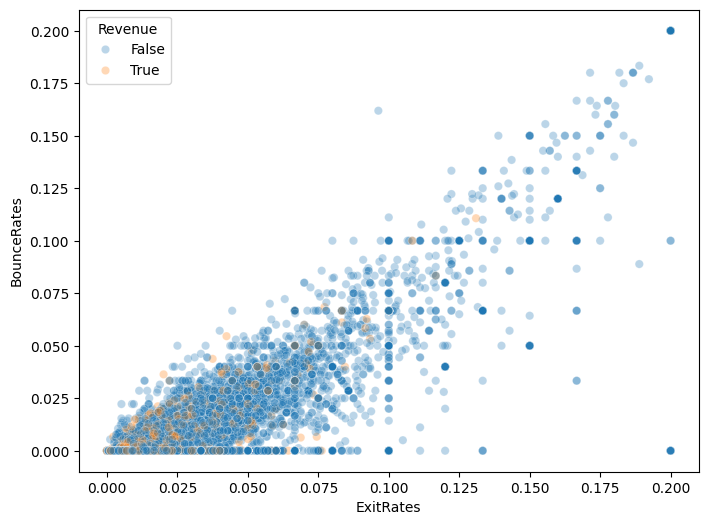

In [333]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=shop_df, x='ExitRates',
                y='BounceRates', hue='Revenue', alpha=0.3)
plt.show()

**Observations**:

 1. Strong Positive Correlation:
 * As ExitRates increase, BounceRates also tend to increase. This is evident from the upward trend in the plot.
 2. Revenue Insights:
 * The orange points (where Revenue = True) are more concentrated in areas with lower ExitRates and lower BounceRates.
 * This suggests that lower ExitRates and BounceRates are likely associated with higher revenue generation.
 3. Cluster of Points Near (0, 0):
 * Many points are clustered near the bottom-left corner, where both ExitRates and BounceRates are close to zero. This might represent pages with minimal user drop-off or no significant user engagement.
 4. Outliers:
 * There are a few points with extremely high ExitRates and BounceRates, which could indicate poorly performing pages or rare cases.

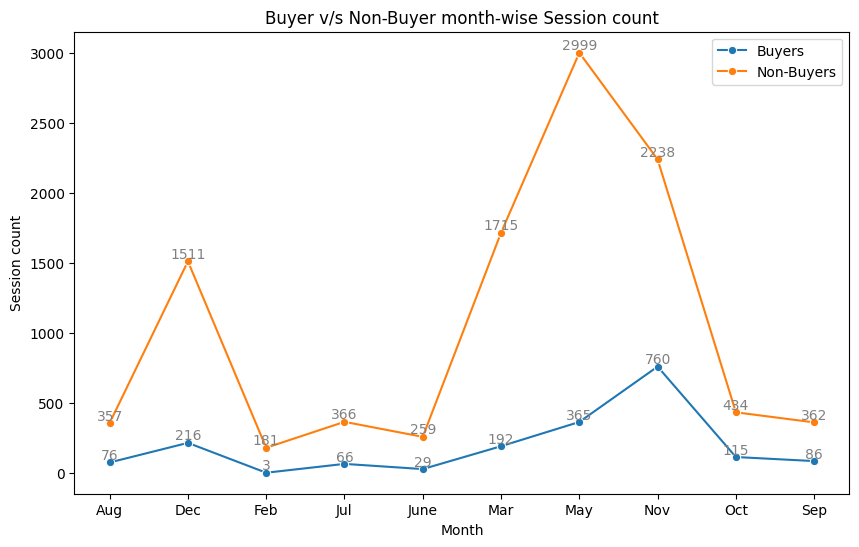

In [334]:
def annotate_plot(dataframe, column, ax):
    for i, point in dataframe.iterrows():
        ax.text(point['Month'], point[column], str(point[column]), color='grey', ha='center', va='bottom')
        
month_customer = shop_df[shop_df['Revenue']].groupby(
    'Month')['Revenue'].agg(Buyers='count').reset_index()
month_customer['Non-Buyers'] = shop_df[~shop_df['Revenue']].groupby('Month')['Revenue'].agg('count').values


plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get current axis

# Plot and annotate for Buyers
sns.lineplot(data=month_customer, x='Month', y='Buyers',
             label='Buyers', marker='o', ax=ax)
annotate_plot(month_customer, 'Buyers', ax)

# Plot and annotate for Non-Buyers
sns.lineplot(data=month_customer, x='Month', y='Non-Buyers',
             label='Non-Buyers', marker='o', ax=ax)
annotate_plot(month_customer, 'Non-Buyers', ax)

plt.ylabel('Session count')
plt.title("Buyer v/s Non-Buyer month-wise Session count")
plt.show()

As per the available data, we can see that the Monthly trend shows that for the month of November, the Customers have a higher Session count where they make a purchase.

In [335]:
# Analysis of Buyer vs Non-buyer session over weekend

weekend_df = shop_df.groupby(['Weekend', 'Revenue']).size().reset_index(name='cnt')
weekend_df = weekend_df.pivot(index='Weekend', columns='Revenue', values='cnt')
# Rename the columns
weekend_df = weekend_df.rename(columns={True: 'Buyers', False: 'Non-Buyers'})
# flattern column level
weekend_df.columns = [''.join(col).strip()
                      for col in weekend_df.columns.values]

# Rename the index
weekend_df = weekend_df.rename(index={True: 'Week_end', False: 'Week_day'})

weekend_df['Buyers Percentage'] = weekend_df['Buyers'] / \
    (weekend_df['Buyers'] + weekend_df['Non-Buyers']) * 100
weekend_df

,Non-Buyers,Buyers,Buyers Percentage
Weekend,,,
Week_day,8053,1409,14.891144
Week_end,2369,499,17.398884


Customers Purchase more during the weekends than on the weekdays

In [336]:
from scipy.stats import spearmanr
corr, pval = spearmanr(shop_df["SpecialDay"], shop_df["Revenue"])
print(f"Spearman Correlation: {corr}, p-value: {pval}")

Spearman Correlation: -0.08687847392973772, p-value: 4.274044002226199e-22


Special Day does not hold much significance in terms of generating revenue

In [337]:
corr, pval = spearmanr(shop_df["Weekend"], shop_df["Revenue"])
print(f"Spearman Correlation: {corr}, p-value: {pval}")

Spearman Correlation: 0.02929536797199449, p-value: 0.0011405626259631213


Weekend does have a stronger correlation in terms of revenue.

In [338]:
print("Operating System Count")
shop_df['OperatingSystems'].value_counts()

Operating System Count


OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64

In [339]:
print("Browser Count")
shop_df['Browser'].value_counts()

Browser Count


Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: count, dtype: int64

Users within sessions mostly use **Browser#2 and Operating System #2**

In [340]:
# Segment users by TrafficType
traffic_types = shop_df["TrafficType"].unique()
purchase_probability = []

for traffic_type in traffic_types:
    segment_data = shop_df[shop_df["TrafficType"] == traffic_type]

    # Calculate summary statistics for aggregated visualization
    aggregated_data = segment_data.groupby("TrafficType").agg(
        mean_administrative=("Administrative", "mean"),
        mean_informational=("Informational", "mean"),
        mean_product_related=("ProductRelated", "mean"),
        mean_administrative_duration=("Administrative_Duration", "mean"),
        mean_informational_duration=("Informational_Duration", "mean"),
        mean_product_related_duration=("ProductRelated_Duration", "mean")
    )

    # Calculate purchase probability
    purchase_probability.append(segment_data["Revenue"].mean())
traffic_df = pd.DataFrame(data={"Traffic Type": traffic_types, "Purchase Probability": purchase_probability})
traffic_df.sort_values(by="Purchase Probability", ascending=False)

,Traffic Type,Purchase Probability
17,16,0.333333
6,7,0.300000
7,8,0.276968
19,20,0.252525
1,2,0.216458
4,5,0.215385
9,10,0.200000
10,11,0.190283
3,4,0.154350
13,14,0.153846


Traffic Type 16 has the highest probability of making a purchase than others

### Summary of Observations from the given Shop Dataset:
* Customers across all Visitor type, focus more on the **Product Related** Pages with the highest duration spent on those pages & with the highest number of sessions
* Returning Customers provide most the revenue in total
* Customers belonging to Traffic Type# 16 have the highest purchase probability
* Weekends have a higher correlation of revenue than Special Days
* Operating System type #2 and Browser Type #2 have a higher prominence in terms of sessions